<a href="https://colab.research.google.com/github/emaudealtema/Deep_learning_repository/blob/master/swedich_auto_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:

# k-fold cross-validation of base model for the auto insurance regression dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

In [35]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)

In [36]:
print(df.shape)

(63, 2)


In [37]:
#afficher les premières lignes du jeu de données
print(df.head())

     0      1
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


In [38]:
#énumération des colonnes
print(df.columns)

Int64Index([0, 1], dtype='int64')


In [39]:
#type de chaque colonne
print(df.dtypes)

0      int64
1    float64
dtype: object


In [40]:
#description des données
print(df.describe(include='all'))

                0           1
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000


In [41]:
#informations sur les données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       63 non-null     int64  
 1   1       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None


In [42]:
# summarize shape
print(df.shape)

(63, 2)


In [43]:
# show summary statistics
print(df.describe())

                0           1
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000


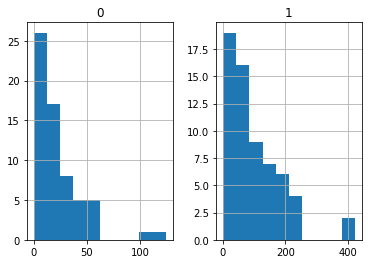

In [44]:
# plot histograms
df.hist()
pyplot.show()

In [45]:

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

In [46]:
# split into train and test datasets
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [47]:
# determine the number of input features
n_features = X.shape[1]

In [48]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))

In [49]:

# compile the model
model.compile(optimizer='adam', loss='mse')

In [50]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_data=(X_test,y_test))

In [51]:
# predict test set
yhat = model.predict(X_test)
# evaluate predictions
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)

MAE: 30.207


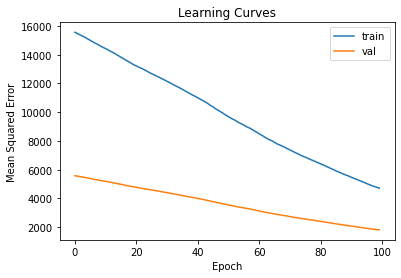

In [52]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [53]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0, validation_data=(X_test,y_test))


In [54]:
# predict test set
yhat = model.predict(X_test)
# evaluate predictions
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)

MAE: 19.247


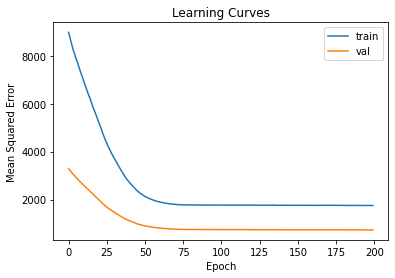

In [55]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [56]:

# ensure that the target variable is a 2d array
y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))

Next, we can apply a PowerTransformer to the input and target variables.

This can be achieved by first fitting the transform on the training data, then transforming the train and test sets.

This process is applied separately for the input and output variables to avoid data leakage.

In [57]:
# power transform input data
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
# power transform output data
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

The data is then used to fit the model.

The transform can then be inverted on the predictions made by the model and the expected target values from the test set and we can calculate the MAE in the correct scale as before

In [58]:

# inverse transforms on target variable
y_test = pt2.inverse_transform(y_test)
yhat = pt2.inverse_transform(yhat)

In [59]:
# evaluate predictions
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)

MAE: 1235621.227


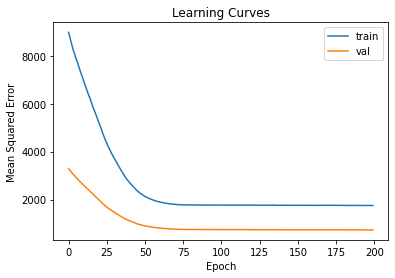

In [60]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()


Evaluating and Tuning MLP Models
The k-fold cross-validation procedure can provide a more reliable estimate of MLP performance, although it can be very slow.

This is because k models must be fit and evaluated. This is not a problem when the dataset size is small, such as the auto insurance dataset.

We can use the KFold class to create the splits and enumerate each fold manually, fit the model, evaluate it, and then report the mean of the evaluation scores at the end of the procedure.

In [62]:
# prepare cross validation
kfold = KFold(10)

In [70]:
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# fit and evaluate the model...
	...
...
# summarize all scores
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: nan (nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Nous pouvons utiliser ce cadre pour développer une estimation fiable des performances du modèle MLP avec une gamme de différentes préparations de données, architectures de modèles et configurations d’apprentissage.

Il est important que nous avons d’abord développé une compréhension de la dynamique d’apprentissage du modèle sur l’ensemble de données dans la section précédente avant d’utiliser k-fold cross-validation pour estimer les performances. Si nous commetons à accorder le modèle directement, nous pourrions obtenir de bons résultats, mais sinon, nous n’aurions peut-être aucune idée de pourquoi, par exemple, que le modèle était terminé ou en cours d’ajustement.

Si nous faisons de grands changements au modèle à nouveau, c’est une bonne idée de revenir en arrière et de confirmer que le modèle converge de façon appropriée.

L’exemple complet de ce cadre pour évaluer le modèle MLP de base de la section précédente est énuméré ci-dessous.

In [72]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# prepare cross validation
kfold = KFold(10)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dense(1))
	# compile the model
	model.compile(optimizer='adam', loss='mse')
	# fit the model
	model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)
	# predict test set
	yhat = model.predict(X_test)
	# evaluate predictions
	score = mean_absolute_error(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)
# summarize all scores
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

>36.257
>40.130
>26.144
>35.374
>19.444
>22.828
>32.982
>40.338
>35.157
>79.284
Mean MAE: 36.794 (15.678)


First, let’s try evaluating a deeper model on the raw dataset to see if it performs any better than a baseline model

In [74]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0)
# predict test set
yhat = model.predict(X_test)
# evaluate predictions
score = mean_absolute_error(y_test, yhat)
print('>%.3f' % score)
scores.append(score)

>61.617


In [75]:
# summarize all scores
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 39.051 (16.565)


Ensuite, essayons d’utiliser le même modèle avec une transformation de puissance pour les variables d’entrée et de cible que nous l’avons fait dans la section précédente.

L’exemple complet est énuméré ci-dessous

In [76]:
# k-fold cross-validation of deeper model with data transforms
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PowerTransformer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

In [77]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# prepare cross validation
kfold = KFold(10)

In [78]:
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# ensure target is a 2d array
	y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))
	# prepare input data
	pt1 = PowerTransformer()
	pt1.fit(X_train)
	X_train = pt1.transform(X_train)
	X_test = pt1.transform(X_test)
	# prepare target
	pt2 = PowerTransformer()
	pt2.fit(y_train)
	y_train = pt2.transform(y_train)
	y_test = pt2.transform(y_test)
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
	model.add(Dense(1))
	# compile the model
	model.compile(optimizer='adam', loss='mse')
	# fit the model
	model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0)
	# predict test set
	yhat = model.predict(X_test)
	# inverse transforms
	y_test = pt2.inverse_transform(y_test)
	yhat = pt2.inverse_transform(yhat)
	# evaluate predictions
	score = mean_absolute_error(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)

>42.325
>31.558
>16.806
>16.436
>15.332
>17.948
>22.096
>47.253
>34.578
>58.422


In [79]:
# summarize all scores
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 30.275 (14.356)


Une autre transformation est de normaliser les variables d’entrée et de cible.

Cela signifie mettre à l’échelle les valeurs de chaque variable à la plage [0, 1]. Nous pouvons y parvenir en utilisant le MinMaxScaler; par exemple :

In [80]:
# prepare input data
pt1 = MinMaxScaler()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
# prepare target
pt2 = MinMaxScaler()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

L’exemple complet de l’évaluation du MLP plus profond avec la normalisation des données est énuméré ci-dessous.

In [81]:

from sklearn.preprocessing import MinMaxScaler

In [82]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# prepare cross validation
kfold = KFold(10)

In [83]:
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# ensure target is a 2d array
	y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))
	# prepare input data
	pt1 = MinMaxScaler()
	pt1.fit(X_train)
	X_train = pt1.transform(X_train)
	X_test = pt1.transform(X_test)
	# prepare target
	pt2 = MinMaxScaler()
	pt2.fit(y_train)
	y_train = pt2.transform(y_train)
	y_test = pt2.transform(y_test)
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
	model.add(Dense(1))
	# compile the model
	model.compile(optimizer='adam', loss='mse')
	# fit the model
	model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0)
	# predict test set
	yhat = model.predict(X_test)
	# inverse transforms
	y_test = pt2.inverse_transform(y_test)
	yhat = pt2.inverse_transform(yhat)
	# evaluate predictions
	score = mean_absolute_error(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)

>42.935
>32.208
>15.301
>13.796
>21.346
>16.927
>60.900
>47.672
>32.864
>57.284


In [84]:
# summarize all scores
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 34.123 (16.572)


Modèle final et faire des prédictions
Une fois que nous choisissons une configuration de modèle, nous pouvons former un modèle final sur toutes les données disponibles et l’utiliser pour faire des prédictions sur de nouvelles données.

Dans ce cas, nous utiliserons le modèle plus profond avec la normalisation des données comme modèle final.

Cela signifie que si nous voulions enregistrer le modèle à déposer, nous aurions à enregistrer le modèle lui-même (pour faire des prédictions), la transformation pour les données d’entrée (pour les nouvelles données d’entrée), et la transformation pour la variable cible (pour les nouvelles prédictions).

Nous pouvons préparer les données et adapter le modèle comme avant, bien que sur l’ensemble de l’ensemble de données au lieu d’un sous-ensemble de formation de l’ensemble de données.

In [86]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [87]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure target is a 2d array
y = y.reshape((len(y),1))
# prepare input data
pt1 = MinMaxScaler()
pt1.fit(X)
X = pt1.transform(X)
# prepare target
pt2 = MinMaxScaler()
pt2.fit(y)
y = pt2.transform(y)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X, y, epochs=200, batch_size=8, verbose=0)
# define a row of new data
row = [13]
# transform the input data
X_new = pt1.transform([row])
# make prediction
yhat = model.predict(X_new)
# invert transform on prediction
yhat = pt2.inverse_transform(yhat)
# report prediction
print('f(%s) = %.3f' % (row, yhat[0]))

f([13]) = 65.731
